## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2019-08-23 11:36:25--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.129.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.129.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  54.2MB/s    in 5.9s    

2019-08-23 11:36:31 (54.5 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

  inflating: /data/test/Barbara_Boxer_51.jpg  
  inflating: /data/test/Barbara_Walters_00.jpg  
  inflating: /data/test/Barbara_Walters_01.jpg  
  inflating: /data/test/Barbara_Walters_20.jpg  
  inflating: /data/test/Barbara_Walters_21.jpg  
  inflating: /data/test/Barbara_Walters_40.jpg  
  inflating: /data/test/Barbara_Walters_41.jpg  
  inflating: /data/test/Barbara_Walters_50.jpg  
  inflating: /data/test/Barbara_Walters_51.jpg  
  inflating: /data/test/Barry_Alvarez_00.jpg  
  inflating: /data/test/Barry_Alvarez_01.jpg  
  inflating: /data/test/Barry_Alvarez_10.jpg  
  inflating: /data/test/Barry_Alvarez_11.jpg  
  inflating: /data/test/Barry_Alvarez_20.jpg  
  inflating: /data/test/Barry_Alvarez_21.jpg  
  inflating: /data/test/Barry_Alvarez_30.jpg  
  inflating: /data/test/Barry_Alvarez_31.jpg  
  inflating: /data/test/Ben_Kingsley_10.jpg  
  inflating: /data/test/Ben_Kingsley_11.jpg  
  inflating: /data/test/Ben_Kingsley_20.jpg  
  inflating: /data/test/Ben_Kingsley_21.jpg  
 

  inflating: /data/test/Chris_Matthews_01.jpg  
  inflating: /data/test/Chris_Matthews_10.jpg  
  inflating: /data/test/Chris_Matthews_11.jpg  
  inflating: /data/test/Chris_Matthews_30.jpg  
  inflating: /data/test/Chris_Matthews_31.jpg  
  inflating: /data/test/Chris_Matthews_50.jpg  
  inflating: /data/test/Chris_Matthews_51.jpg  
  inflating: /data/test/Chris_Noth_00.jpg  
  inflating: /data/test/Chris_Noth_01.jpg  
  inflating: /data/test/Chris_Noth_10.jpg  
  inflating: /data/test/Chris_Noth_11.jpg  
  inflating: /data/test/Chris_Noth_30.jpg  
  inflating: /data/test/Chris_Noth_31.jpg  
  inflating: /data/test/Chris_Rock_00.jpg  
  inflating: /data/test/Chris_Rock_01.jpg  
  inflating: /data/test/Chris_Rock_10.jpg  
  inflating: /data/test/Chris_Rock_11.jpg  
  inflating: /data/test/Chris_Rock_20.jpg  
  inflating: /data/test/Chris_Rock_21.jpg  
  inflating: /data/test/Christine_Ebersole_00.jpg  
  inflating: /data/test/Christine_Ebersole_01.jpg  
  inflating: /data/test/Christin

  inflating: /data/test/Danny_Glover_11.jpg  
  inflating: /data/test/Danny_Glover_30.jpg  
  inflating: /data/test/Danny_Glover_31.jpg  
  inflating: /data/test/Danny_Glover_50.jpg  
  inflating: /data/test/Danny_Glover_51.jpg  
  inflating: /data/test/Darrell_Issa_00.jpg  
  inflating: /data/test/Darrell_Issa_01.jpg  
  inflating: /data/test/Darrell_Issa_20.jpg  
  inflating: /data/test/Darrell_Issa_21.jpg  
  inflating: /data/test/Darrell_Issa_30.jpg  
  inflating: /data/test/Darrell_Issa_31.jpg  
  inflating: /data/test/Darrell_Issa_40.jpg  
  inflating: /data/test/Darrell_Issa_41.jpg  
  inflating: /data/test/Dave_Campo_10.jpg  
  inflating: /data/test/Dave_Campo_11.jpg  
  inflating: /data/test/Dave_Campo_20.jpg  
  inflating: /data/test/Dave_Campo_21.jpg  
  inflating: /data/test/Dave_Campo_30.jpg  
  inflating: /data/test/Dave_Campo_31.jpg  
  inflating: /data/test/David_Brent_00.jpg  
  inflating: /data/test/David_Brent_01.jpg  
  inflating: /data/test/David_Brent_10.jpg  
  i

  inflating: /data/test/Estelle_Morris_11.jpg  
  inflating: /data/test/Estelle_Morris_20.jpg  
  inflating: /data/test/Estelle_Morris_21.jpg  
  inflating: /data/test/Estelle_Morris_30.jpg  
  inflating: /data/test/Estelle_Morris_31.jpg  
  inflating: /data/test/Ethan_Hawke_00.jpg  
  inflating: /data/test/Ethan_Hawke_01.jpg  
  inflating: /data/test/Ethan_Hawke_10.jpg  
  inflating: /data/test/Ethan_Hawke_11.jpg  
  inflating: /data/test/Ethan_Hawke_30.jpg  
  inflating: /data/test/Ethan_Hawke_31.jpg  
  inflating: /data/test/Ethan_Hawke_40.jpg  
  inflating: /data/test/Ethan_Hawke_41.jpg  
  inflating: /data/test/Eunice_Barber_00.jpg  
  inflating: /data/test/Eunice_Barber_01.jpg  
  inflating: /data/test/Eunice_Barber_10.jpg  
  inflating: /data/test/Eunice_Barber_11.jpg  
  inflating: /data/test/Eunice_Barber_50.jpg  
  inflating: /data/test/Eunice_Barber_51.jpg  
  inflating: /data/test/Fernando_Henrique_Cardoso_00.jpg  
  inflating: /data/test/Fernando_Henrique_Cardoso_01.jpg  


  inflating: /data/test/Jackie_Sherrill_51.jpg  
  inflating: /data/test/Jacqueline_Gold_00.jpg  
  inflating: /data/test/Jacqueline_Gold_01.jpg  
  inflating: /data/test/Jacqueline_Gold_20.jpg  
  inflating: /data/test/Jacqueline_Gold_21.jpg  
  inflating: /data/test/Jacqueline_Gold_30.jpg  
  inflating: /data/test/Jacqueline_Gold_31.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_00.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_01.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_20.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_21.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_30.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_31.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_50.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_51.jpg  
  inflating: /data/test/Jaime_Pressly_00.jpg  
  inflating: /data/test/Jaime_Pressly_01.jpg  
  inflating: /data/test/Jaime_Pressly_10.jpg  
  inflating: /data/test/Jaime_Pressly_11.jpg  
  inflating: /data/test/Jaime_Pressly_40.jpg  
  inflating: /

  inflating: /data/test/Kristin_Scott_51.jpg  
  inflating: /data/test/Kristy_Curry_00.jpg  
  inflating: /data/test/Kristy_Curry_01.jpg  
  inflating: /data/test/Kristy_Curry_20.jpg  
  inflating: /data/test/Kristy_Curry_21.jpg  
  inflating: /data/test/Kristy_Curry_30.jpg  
  inflating: /data/test/Kristy_Curry_31.jpg  
  inflating: /data/test/Kurt_Warner_00.jpg  
  inflating: /data/test/Kurt_Warner_01.jpg  
  inflating: /data/test/Kurt_Warner_10.jpg  
  inflating: /data/test/Kurt_Warner_11.jpg  
  inflating: /data/test/Kurt_Warner_40.jpg  
  inflating: /data/test/Kurt_Warner_41.jpg  
  inflating: /data/test/Kweisi_Mfume_00.jpg  
  inflating: /data/test/Kweisi_Mfume_01.jpg  
  inflating: /data/test/Kweisi_Mfume_10.jpg  
  inflating: /data/test/Kweisi_Mfume_11.jpg  
  inflating: /data/test/Kweisi_Mfume_40.jpg  
  inflating: /data/test/Kweisi_Mfume_41.jpg  
  inflating: /data/test/Kweisi_Mfume_50.jpg  
  inflating: /data/test/Kweisi_Mfume_51.jpg  
  inflating: /data/test/Kyle_Shewfelt_0

  inflating: /data/test/Lucia_Kenny_Anthony_41.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_50.jpg  
  inflating: /data/test/Lucia_Kenny_Anthony_51.jpg  
  inflating: /data/test/Lucio_Stanca_00.jpg  
  inflating: /data/test/Lucio_Stanca_01.jpg  
  inflating: /data/test/Lucio_Stanca_20.jpg  
  inflating: /data/test/Lucio_Stanca_21.jpg  
  inflating: /data/test/Lucio_Stanca_30.jpg  
  inflating: /data/test/Lucio_Stanca_31.jpg  
  inflating: /data/test/Lucio_Stanca_40.jpg  
  inflating: /data/test/Lucio_Stanca_41.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_00.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_01.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_10.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_11.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_50.jpg  
  inflating: /data/test/Luis_Ernesto_Derbez_Bautista_51.jpg  
  inflating: /data/test/Luis_Fonsi_20.jpg  
  inflating: /data/test/Luis_Fonsi_21.jpg  
  inflating: 

  inflating: /data/test/Natalia_Vodonova_10.jpg  
  inflating: /data/test/Natalia_Vodonova_11.jpg  
  inflating: /data/test/Natalia_Vodonova_20.jpg  
  inflating: /data/test/Natalia_Vodonova_21.jpg  
  inflating: /data/test/Natasha_Lyonne_00.jpg  
  inflating: /data/test/Natasha_Lyonne_01.jpg  
  inflating: /data/test/Natasha_Lyonne_10.jpg  
  inflating: /data/test/Natasha_Lyonne_11.jpg  
  inflating: /data/test/Natasha_Lyonne_40.jpg  
  inflating: /data/test/Natasha_Lyonne_41.jpg  
  inflating: /data/test/Nick_Reilly_10.jpg  
  inflating: /data/test/Nick_Reilly_11.jpg  
  inflating: /data/test/Nick_Reilly_40.jpg  
  inflating: /data/test/Nick_Reilly_41.jpg  
  inflating: /data/test/Nick_Reilly_50.jpg  
  inflating: /data/test/Nick_Reilly_51.jpg  
  inflating: /data/test/Nicolas_Eyzaguirre_00.jpg  
  inflating: /data/test/Nicolas_Eyzaguirre_01.jpg  
  inflating: /data/test/Nicolas_Eyzaguirre_10.jpg  
  inflating: /data/test/Nicolas_Eyzaguirre_11.jpg  
  inflating: /data/test/Nicolas_Ey

  inflating: /data/test/Raja_Zafar-ul-Haq_21.jpg  
  inflating: /data/test/Raja_Zafar-ul-Haq_30.jpg  
  inflating: /data/test/Raja_Zafar-ul-Haq_31.jpg  
  inflating: /data/test/Ralph_Klein_00.jpg  
  inflating: /data/test/Ralph_Klein_01.jpg  
  inflating: /data/test/Ralph_Klein_10.jpg  
  inflating: /data/test/Ralph_Klein_11.jpg  
  inflating: /data/test/Ralph_Klein_30.jpg  
  inflating: /data/test/Ralph_Klein_31.jpg  
  inflating: /data/test/Raza_Rabbani_20.jpg  
  inflating: /data/test/Raza_Rabbani_21.jpg  
  inflating: /data/test/Raza_Rabbani_30.jpg  
  inflating: /data/test/Raza_Rabbani_31.jpg  
  inflating: /data/test/Raza_Rabbani_50.jpg  
  inflating: /data/test/Raza_Rabbani_51.jpg  
  inflating: /data/test/Recep_Tayyip_Erdogan_00.jpg  
  inflating: /data/test/Recep_Tayyip_Erdogan_01.jpg  
  inflating: /data/test/Recep_Tayyip_Erdogan_20.jpg  
  inflating: /data/test/Recep_Tayyip_Erdogan_21.jpg  
  inflating: /data/test/Recep_Tayyip_Erdogan_40.jpg  
  inflating: /data/test/Recep_T

  inflating: /data/test/Tim_Pawlenty_00.jpg  
  inflating: /data/test/Tim_Pawlenty_01.jpg  
  inflating: /data/test/Tim_Pawlenty_30.jpg  
  inflating: /data/test/Tim_Pawlenty_31.jpg  
  inflating: /data/test/Tim_Pawlenty_40.jpg  
  inflating: /data/test/Tim_Pawlenty_41.jpg  
  inflating: /data/test/Tim_Pawlenty_50.jpg  
  inflating: /data/test/Tim_Pawlenty_51.jpg  
  inflating: /data/test/Timothy_Goebel_00.jpg  
  inflating: /data/test/Timothy_Goebel_01.jpg  
  inflating: /data/test/Timothy_Goebel_30.jpg  
  inflating: /data/test/Timothy_Goebel_31.jpg  
  inflating: /data/test/Timothy_Goebel_40.jpg  
  inflating: /data/test/Timothy_Goebel_41.jpg  
  inflating: /data/test/Timothy_Goebel_50.jpg  
  inflating: /data/test/Timothy_Goebel_51.jpg  
  inflating: /data/test/Tina_Brown_20.jpg  
  inflating: /data/test/Tina_Brown_21.jpg  
  inflating: /data/test/Tina_Brown_40.jpg  
  inflating: /data/test/Tina_Brown_41.jpg  
  inflating: /data/test/Tina_Brown_50.jpg  
  inflating: /data/test/Tina

  inflating: /data/training/Adam_Sandler_02.jpg  
  inflating: /data/training/Adam_Sandler_10.jpg  
  inflating: /data/training/Adam_Sandler_11.jpg  
  inflating: /data/training/Adam_Sandler_12.jpg  
  inflating: /data/training/Adam_Sandler_40.jpg  
  inflating: /data/training/Adam_Sandler_41.jpg  
  inflating: /data/training/Adam_Sandler_42.jpg  
  inflating: /data/training/Adrian_Nastase_10.jpg  
  inflating: /data/training/Adrian_Nastase_11.jpg  
  inflating: /data/training/Adrian_Nastase_12.jpg  
  inflating: /data/training/Adrian_Nastase_40.jpg  
  inflating: /data/training/Adrian_Nastase_41.jpg  
  inflating: /data/training/Adrian_Nastase_42.jpg  
  inflating: /data/training/Adrian_Nastase_50.jpg  
  inflating: /data/training/Adrian_Nastase_51.jpg  
  inflating: /data/training/Adrian_Nastase_52.jpg  
  inflating: /data/training/Agbani_Darego_00.jpg  
  inflating: /data/training/Agbani_Darego_01.jpg  
  inflating: /data/training/Agbani_Darego_02.jpg  
  inflating: /data/training/A

  inflating: /data/training/Amy_Brenneman_50.jpg  
  inflating: /data/training/Amy_Brenneman_51.jpg  
  inflating: /data/training/Amy_Brenneman_52.jpg  
  inflating: /data/training/Andrea_Bocelli_10.jpg  
  inflating: /data/training/Andrea_Bocelli_11.jpg  
  inflating: /data/training/Andrea_Bocelli_12.jpg  
  inflating: /data/training/Andrea_Bocelli_20.jpg  
  inflating: /data/training/Andrea_Bocelli_21.jpg  
  inflating: /data/training/Andrea_Bocelli_22.jpg  
  inflating: /data/training/Andrea_Bocelli_30.jpg  
  inflating: /data/training/Andrea_Bocelli_31.jpg  
  inflating: /data/training/Andrea_Bocelli_32.jpg  
  inflating: /data/training/Andy_Roddick_20.jpg  
  inflating: /data/training/Andy_Roddick_21.jpg  
  inflating: /data/training/Andy_Roddick_22.jpg  
  inflating: /data/training/Andy_Roddick_40.jpg  
  inflating: /data/training/Andy_Roddick_41.jpg  
  inflating: /data/training/Andy_Roddick_42.jpg  
  inflating: /data/training/Andy_Roddick_50.jpg  
  inflating: /data/training/A

  inflating: /data/training/Bill_Bradley_51.jpg  
  inflating: /data/training/Bill_Bradley_52.jpg  
  inflating: /data/training/Bill_Clinton_00.jpg  
  inflating: /data/training/Bill_Clinton_01.jpg  
  inflating: /data/training/Bill_Clinton_02.jpg  
  inflating: /data/training/Bill_Clinton_10.jpg  
  inflating: /data/training/Bill_Clinton_11.jpg  
  inflating: /data/training/Bill_Clinton_12.jpg  
  inflating: /data/training/Bill_Clinton_50.jpg  
  inflating: /data/training/Bill_Clinton_51.jpg  
  inflating: /data/training/Bill_Clinton_52.jpg  
  inflating: /data/training/Bill_Frist_00.jpg  
  inflating: /data/training/Bill_Frist_01.jpg  
  inflating: /data/training/Bill_Frist_02.jpg  
  inflating: /data/training/Bill_Frist_10.jpg  
  inflating: /data/training/Bill_Frist_11.jpg  
  inflating: /data/training/Bill_Frist_12.jpg  
  inflating: /data/training/Bill_Frist_20.jpg  
  inflating: /data/training/Bill_Frist_21.jpg  
  inflating: /data/training/Bill_Frist_22.jpg  
  inflating: /data

  inflating: /data/training/Chita_Rivera_11.jpg  
  inflating: /data/training/Chita_Rivera_12.jpg  
  inflating: /data/training/Chita_Rivera_30.jpg  
  inflating: /data/training/Chita_Rivera_31.jpg  
  inflating: /data/training/Chita_Rivera_32.jpg  
  inflating: /data/training/Chris_Cirino_20.jpg  
  inflating: /data/training/Chris_Cirino_21.jpg  
  inflating: /data/training/Chris_Cirino_22.jpg  
  inflating: /data/training/Chris_Cirino_30.jpg  
  inflating: /data/training/Chris_Cirino_31.jpg  
  inflating: /data/training/Chris_Cirino_32.jpg  
  inflating: /data/training/Chris_Cirino_50.jpg  
  inflating: /data/training/Chris_Cirino_51.jpg  
  inflating: /data/training/Chris_Cirino_52.jpg  
  inflating: /data/training/Chris_Cooper_00.jpg  
  inflating: /data/training/Chris_Cooper_01.jpg  
  inflating: /data/training/Chris_Cooper_02.jpg  
  inflating: /data/training/Chris_Cooper_30.jpg  
  inflating: /data/training/Chris_Cooper_31.jpg  
  inflating: /data/training/Chris_Cooper_32.jpg  


  inflating: /data/training/Condoleezza_Rice_20.jpg  
  inflating: /data/training/Condoleezza_Rice_21.jpg  
  inflating: /data/training/Condoleezza_Rice_22.jpg  
  inflating: /data/training/Condoleezza_Rice_30.jpg  
  inflating: /data/training/Condoleezza_Rice_31.jpg  
  inflating: /data/training/Condoleezza_Rice_32.jpg  
  inflating: /data/training/Condoleezza_Rice_40.jpg  
  inflating: /data/training/Condoleezza_Rice_41.jpg  
  inflating: /data/training/Condoleezza_Rice_42.jpg  
  inflating: /data/training/Connie_Chung_20.jpg  
  inflating: /data/training/Connie_Chung_21.jpg  
  inflating: /data/training/Connie_Chung_22.jpg  
  inflating: /data/training/Connie_Chung_30.jpg  
  inflating: /data/training/Connie_Chung_31.jpg  
  inflating: /data/training/Connie_Chung_32.jpg  
  inflating: /data/training/Connie_Chung_40.jpg  
  inflating: /data/training/Connie_Chung_41.jpg  
  inflating: /data/training/Connie_Chung_42.jpg  
  inflating: /data/training/Connie_Chung_50.jpg  
  inflating: /

  inflating: /data/training/Eduardo_Duhalde_02.jpg  
  inflating: /data/training/Eduardo_Duhalde_10.jpg  
  inflating: /data/training/Eduardo_Duhalde_11.jpg  
  inflating: /data/training/Eduardo_Duhalde_12.jpg  
  inflating: /data/training/Eduardo_Duhalde_30.jpg  
  inflating: /data/training/Eduardo_Duhalde_31.jpg  
  inflating: /data/training/Eduardo_Duhalde_32.jpg  
  inflating: /data/training/Edward_Burns_10.jpg  
  inflating: /data/training/Edward_Burns_11.jpg  
  inflating: /data/training/Edward_Burns_12.jpg  
  inflating: /data/training/Edward_Burns_20.jpg  
  inflating: /data/training/Edward_Burns_21.jpg  
  inflating: /data/training/Edward_Burns_22.jpg  
  inflating: /data/training/Edward_Burns_30.jpg  
  inflating: /data/training/Edward_Burns_31.jpg  
  inflating: /data/training/Edward_Burns_32.jpg  
  inflating: /data/training/Edward_Burns_50.jpg  
  inflating: /data/training/Edward_Burns_51.jpg  
  inflating: /data/training/Edward_Burns_52.jpg  
  inflating: /data/training/E

  inflating: /data/training/Ernesto_Zedillo_11.jpg  
  inflating: /data/training/Ernesto_Zedillo_12.jpg  
  inflating: /data/training/Ernesto_Zedillo_20.jpg  
  inflating: /data/training/Ernesto_Zedillo_21.jpg  
  inflating: /data/training/Ernesto_Zedillo_22.jpg  
  inflating: /data/training/Ernesto_Zedillo_30.jpg  
  inflating: /data/training/Ernesto_Zedillo_31.jpg  
  inflating: /data/training/Ernesto_Zedillo_32.jpg  
  inflating: /data/training/Ernesto_Zedillo_40.jpg  
  inflating: /data/training/Ernesto_Zedillo_41.jpg  
  inflating: /data/training/Ernesto_Zedillo_42.jpg  
  inflating: /data/training/Ernie_Grunfeld_20.jpg  
  inflating: /data/training/Ernie_Grunfeld_21.jpg  
  inflating: /data/training/Ernie_Grunfeld_22.jpg  
  inflating: /data/training/Ernie_Grunfeld_30.jpg  
  inflating: /data/training/Ernie_Grunfeld_31.jpg  
  inflating: /data/training/Ernie_Grunfeld_32.jpg  
  inflating: /data/training/Ernie_Grunfeld_40.jpg  
  inflating: /data/training/Ernie_Grunfeld_41.jpg  
 

  inflating: /data/training/Gary_Coleman_41.jpg  
  inflating: /data/training/Gary_Coleman_42.jpg  
  inflating: /data/training/Gary_Coleman_50.jpg  
  inflating: /data/training/Gary_Coleman_51.jpg  
  inflating: /data/training/Gary_Coleman_52.jpg  
  inflating: /data/training/Gary_Condit_00.jpg  
  inflating: /data/training/Gary_Condit_01.jpg  
  inflating: /data/training/Gary_Condit_02.jpg  
  inflating: /data/training/Gary_Condit_10.jpg  
  inflating: /data/training/Gary_Condit_11.jpg  
  inflating: /data/training/Gary_Condit_12.jpg  
  inflating: /data/training/Gary_Condit_30.jpg  
  inflating: /data/training/Gary_Condit_31.jpg  
  inflating: /data/training/Gary_Condit_32.jpg  
  inflating: /data/training/Gene_Hackman_20.jpg  
  inflating: /data/training/Gene_Hackman_21.jpg  
  inflating: /data/training/Gene_Hackman_22.jpg  
  inflating: /data/training/Gene_Hackman_30.jpg  
  inflating: /data/training/Gene_Hackman_31.jpg  
  inflating: /data/training/Gene_Hackman_32.jpg  
  inflati

  inflating: /data/training/James_Cunningham_42.jpg  
  inflating: /data/training/James_Hoffa_10.jpg  
  inflating: /data/training/James_Hoffa_11.jpg  
  inflating: /data/training/James_Hoffa_12.jpg  
  inflating: /data/training/James_Hoffa_20.jpg  
  inflating: /data/training/James_Hoffa_21.jpg  
  inflating: /data/training/James_Hoffa_22.jpg  
  inflating: /data/training/James_Hoffa_40.jpg  
  inflating: /data/training/James_Hoffa_41.jpg  
  inflating: /data/training/James_Hoffa_42.jpg  
  inflating: /data/training/James_Hoffa_50.jpg  
  inflating: /data/training/James_Hoffa_51.jpg  
  inflating: /data/training/James_Hoffa_52.jpg  
  inflating: /data/training/James_Lockhart_00.jpg  
  inflating: /data/training/James_Lockhart_01.jpg  
  inflating: /data/training/James_Lockhart_02.jpg  
  inflating: /data/training/James_Lockhart_10.jpg  
  inflating: /data/training/James_Lockhart_11.jpg  
  inflating: /data/training/James_Lockhart_12.jpg  
  inflating: /data/training/James_Lockhart_50.

  inflating: /data/training/Kieran_Culkin_11.jpg  
  inflating: /data/training/Kieran_Culkin_12.jpg  
  inflating: /data/training/Kieran_Culkin_20.jpg  
  inflating: /data/training/Kieran_Culkin_21.jpg  
  inflating: /data/training/Kieran_Culkin_22.jpg  
  inflating: /data/training/Kirk_Ferentz_00.jpg  
  inflating: /data/training/Kirk_Ferentz_01.jpg  
  inflating: /data/training/Kirk_Ferentz_02.jpg  
  inflating: /data/training/Kirk_Ferentz_20.jpg  
  inflating: /data/training/Kirk_Ferentz_21.jpg  
  inflating: /data/training/Kirk_Ferentz_22.jpg  
  inflating: /data/training/Kirk_Ferentz_40.jpg  
  inflating: /data/training/Kirk_Ferentz_41.jpg  
  inflating: /data/training/Kirk_Ferentz_42.jpg  
  inflating: /data/training/Kirk_Ferentz_50.jpg  
  inflating: /data/training/Kirk_Ferentz_51.jpg  
  inflating: /data/training/Kirk_Ferentz_52.jpg  
  inflating: /data/training/Kirsten_Dunst_00.jpg  
  inflating: /data/training/Kirsten_Dunst_01.jpg  
  inflating: /data/training/Kirsten_Dunst_0

  inflating: /data/training/Lester_Holt_40.jpg  
  inflating: /data/training/Lester_Holt_41.jpg  
  inflating: /data/training/Lester_Holt_42.jpg  
  inflating: /data/training/Leszek_Miller_00.jpg  
  inflating: /data/training/Leszek_Miller_01.jpg  
  inflating: /data/training/Leszek_Miller_02.jpg  
  inflating: /data/training/Leszek_Miller_10.jpg  
  inflating: /data/training/Leszek_Miller_11.jpg  
  inflating: /data/training/Leszek_Miller_12.jpg  
  inflating: /data/training/Leszek_Miller_30.jpg  
  inflating: /data/training/Leszek_Miller_31.jpg  
  inflating: /data/training/Leszek_Miller_32.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_00.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_01.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_02.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_10.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_11.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_12.jpg  
  inflating: /data/training/Leticia_Van_de_Put

  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_51.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_52.jpg  
  inflating: /data/training/Luis_Fonsi_20.jpg  
  inflating: /data/training/Luis_Fonsi_21.jpg  
  inflating: /data/training/Luis_Fonsi_22.jpg  
  inflating: /data/training/Luis_Fonsi_40.jpg  
  inflating: /data/training/Luis_Fonsi_41.jpg  
  inflating: /data/training/Luis_Fonsi_42.jpg  
  inflating: /data/training/Luis_Fonsi_50.jpg  
  inflating: /data/training/Luis_Fonsi_51.jpg  
  inflating: /data/training/Luis_Fonsi_52.jpg  
  inflating: /data/training/Lyle_Lovett_20.jpg  
  inflating: /data/training/Lyle_Lovett_21.jpg  
  inflating: /data/training/Lyle_Lovett_22.jpg  
  inflating: /data/training/Lyle_Lovett_40.jpg  
  inflating: /data/training/Lyle_Lovett_41.jpg  
  inflating: /data/training/Lyle_Lovett_42.jpg  
  inflating: /data/training/Lyle_Lovett_50.jpg  
  inflating: /data/training/Lyle_Lovett_51.jpg  
  inflating: /data/training/Lyle_Lovett_52.j

  inflating: /data/training/Mark_Foley_50.jpg  
  inflating: /data/training/Mark_Foley_51.jpg  
  inflating: /data/training/Mark_Foley_52.jpg  
  inflating: /data/training/Mark_Leno_10.jpg  
  inflating: /data/training/Mark_Leno_11.jpg  
  inflating: /data/training/Mark_Leno_12.jpg  
  inflating: /data/training/Mark_Leno_20.jpg  
  inflating: /data/training/Mark_Leno_21.jpg  
  inflating: /data/training/Mark_Leno_22.jpg  
  inflating: /data/training/Mark_Leno_30.jpg  
  inflating: /data/training/Mark_Leno_31.jpg  
  inflating: /data/training/Mark_Leno_32.jpg  
  inflating: /data/training/Martin_Luther_King_III_00.jpg  
  inflating: /data/training/Martin_Luther_King_III_01.jpg  
  inflating: /data/training/Martin_Luther_King_III_02.jpg  
  inflating: /data/training/Martin_Luther_King_III_30.jpg  
  inflating: /data/training/Martin_Luther_King_III_31.jpg  
  inflating: /data/training/Martin_Luther_King_III_32.jpg  
  inflating: /data/training/Martin_Luther_King_III_50.jpg  
  inflating: 

  inflating: /data/training/Olivia_Newton-John_11.jpg  
  inflating: /data/training/Olivia_Newton-John_12.jpg  
  inflating: /data/training/Olivia_Newton-John_40.jpg  
  inflating: /data/training/Olivia_Newton-John_41.jpg  
  inflating: /data/training/Olivia_Newton-John_42.jpg  
  inflating: /data/training/Orlando_Bloom_00.jpg  
  inflating: /data/training/Orlando_Bloom_01.jpg  
  inflating: /data/training/Orlando_Bloom_02.jpg  
  inflating: /data/training/Orlando_Bloom_30.jpg  
  inflating: /data/training/Orlando_Bloom_31.jpg  
  inflating: /data/training/Orlando_Bloom_32.jpg  
  inflating: /data/training/Orlando_Bloom_40.jpg  
  inflating: /data/training/Orlando_Bloom_41.jpg  
  inflating: /data/training/Orlando_Bloom_42.jpg  
  inflating: /data/training/Orlando_Bloom_50.jpg  
  inflating: /data/training/Orlando_Bloom_51.jpg  
  inflating: /data/training/Orlando_Bloom_52.jpg  
  inflating: /data/training/Otto_Reich_00.jpg  
  inflating: /data/training/Otto_Reich_01.jpg  
  inflating:

  inflating: /data/training/Queen_Noor_31.jpg  
  inflating: /data/training/Queen_Noor_32.jpg  
  inflating: /data/training/Queen_Noor_50.jpg  
  inflating: /data/training/Queen_Noor_51.jpg  
  inflating: /data/training/Queen_Noor_52.jpg  
  inflating: /data/training/Queen_Rania_10.jpg  
  inflating: /data/training/Queen_Rania_11.jpg  
  inflating: /data/training/Queen_Rania_12.jpg  
  inflating: /data/training/Queen_Rania_30.jpg  
  inflating: /data/training/Queen_Rania_31.jpg  
  inflating: /data/training/Queen_Rania_32.jpg  
  inflating: /data/training/Queen_Rania_50.jpg  
  inflating: /data/training/Queen_Rania_51.jpg  
  inflating: /data/training/Queen_Rania_52.jpg  
  inflating: /data/training/Rachel_Hunter_30.jpg  
  inflating: /data/training/Rachel_Hunter_31.jpg  
  inflating: /data/training/Rachel_Hunter_32.jpg  
  inflating: /data/training/Rachel_Hunter_40.jpg  
  inflating: /data/training/Rachel_Hunter_41.jpg  
  inflating: /data/training/Rachel_Hunter_42.jpg  
  inflating: 

  inflating: /data/training/Rodrigo_Borja_41.jpg  
  inflating: /data/training/Rodrigo_Borja_42.jpg  
  inflating: /data/training/Rodrigo_Borja_50.jpg  
  inflating: /data/training/Rodrigo_Borja_51.jpg  
  inflating: /data/training/Rodrigo_Borja_52.jpg  
  inflating: /data/training/Saeed_Mortazavi_10.jpg  
  inflating: /data/training/Saeed_Mortazavi_11.jpg  
  inflating: /data/training/Saeed_Mortazavi_12.jpg  
  inflating: /data/training/Saeed_Mortazavi_20.jpg  
  inflating: /data/training/Saeed_Mortazavi_21.jpg  
  inflating: /data/training/Saeed_Mortazavi_22.jpg  
  inflating: /data/training/Saeed_Mortazavi_50.jpg  
  inflating: /data/training/Saeed_Mortazavi_51.jpg  
  inflating: /data/training/Saeed_Mortazavi_52.jpg  
  inflating: /data/training/Sally_Ride_00.jpg  
  inflating: /data/training/Sally_Ride_01.jpg  
  inflating: /data/training/Sally_Ride_02.jpg  
  inflating: /data/training/Sally_Ride_40.jpg  
  inflating: /data/training/Sally_Ride_41.jpg  
  inflating: /data/training/

  inflating: /data/training/Tina_Brown_50.jpg  
  inflating: /data/training/Tina_Brown_51.jpg  
  inflating: /data/training/Tina_Brown_52.jpg  
  inflating: /data/training/Tom_Coughlin_20.jpg  
  inflating: /data/training/Tom_Coughlin_21.jpg  
  inflating: /data/training/Tom_Coughlin_22.jpg  
  inflating: /data/training/Tom_Coughlin_30.jpg  
  inflating: /data/training/Tom_Coughlin_31.jpg  
  inflating: /data/training/Tom_Coughlin_32.jpg  
  inflating: /data/training/Tom_Coughlin_50.jpg  
  inflating: /data/training/Tom_Coughlin_51.jpg  
  inflating: /data/training/Tom_Coughlin_52.jpg  
  inflating: /data/training/Tom_Hanks_30.jpg  
  inflating: /data/training/Tom_Hanks_31.jpg  
  inflating: /data/training/Tom_Hanks_32.jpg  
  inflating: /data/training/Tom_Hanks_40.jpg  
  inflating: /data/training/Tom_Hanks_41.jpg  
  inflating: /data/training/Tom_Hanks_42.jpg  
  inflating: /data/training/Tom_Hanks_50.jpg  
  inflating: /data/training/Tom_Hanks_51.jpg  
  inflating: /data/training/To

  inflating: /data/training/Zhang_Ziyi_20.jpg  
  inflating: /data/training/Zhang_Ziyi_21.jpg  
  inflating: /data/training/Zhang_Ziyi_22.jpg  
  inflating: /data/training/Zhang_Ziyi_40.jpg  
  inflating: /data/training/Zhang_Ziyi_41.jpg  
  inflating: /data/training/Zhang_Ziyi_42.jpg  
  inflating: /data/training/Zhong_Nanshan_00.jpg  
  inflating: /data/training/Zhong_Nanshan_01.jpg  
  inflating: /data/training/Zhong_Nanshan_02.jpg  
  inflating: /data/training/Zhong_Nanshan_10.jpg  
  inflating: /data/training/Zhong_Nanshan_11.jpg  
  inflating: /data/training/Zhong_Nanshan_12.jpg  
  inflating: /data/training/Zhong_Nanshan_50.jpg  
  inflating: /data/training/Zhong_Nanshan_51.jpg  
  inflating: /data/training/Zhong_Nanshan_52.jpg  
  inflating: /data/training_frames_keypoints.csv  


<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1)
  (dropout2): Dropout(p=0.2)
  (dropout3): Dropout(p=0.3)
  (dropout4): Dropout(p=0.4)
  (dropout5): Dropout(p=0.5)
  (dropout6): Dropout(p=0.6)
  (fc1): Linear(in_features=36864, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=136, bias=True)
)


In [4]:
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'
net.load_state_dict(torch.load(model_dir+model_name))
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.1)
  (dropout2): Dropout(p=0.2)
  (dropout3): Dropout(p=0.3)
  (dropout4): Dropout(p=0.4)
  (dropout5): Dropout(p=0.5)
  (dropout6): Dropout(p=0.6)
  (fc1): Linear(in_features=36864, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=136, bias=True)
)


## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [5]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(256),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [6]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [7]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [8]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [9]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [10]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [11]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [12]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

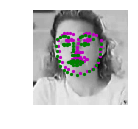

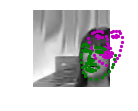

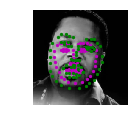

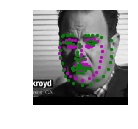

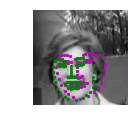

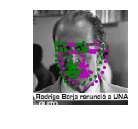

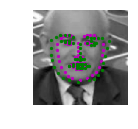

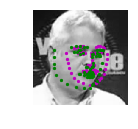

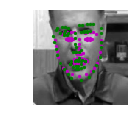

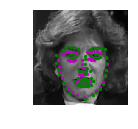

In [13]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [24]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr = 0.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [16]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [15]:
# train your network
n_epochs = 30 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.5099262610077858
Epoch: 1, Batch: 20, Avg. Loss: 0.29396472722291944
Epoch: 1, Batch: 30, Avg. Loss: 0.25587149858474734
Epoch: 1, Batch: 40, Avg. Loss: 0.2150049164891243
Epoch: 1, Batch: 50, Avg. Loss: 0.22623132765293122
Epoch: 1, Batch: 60, Avg. Loss: 0.2748477876186371
Epoch: 1, Batch: 70, Avg. Loss: 0.24659567475318908
Epoch: 1, Batch: 80, Avg. Loss: 0.20909527614712714
Epoch: 1, Batch: 90, Avg. Loss: 0.24207497388124466
Epoch: 1, Batch: 100, Avg. Loss: 0.22375444769859315
Epoch: 1, Batch: 110, Avg. Loss: 0.21875213235616683
Epoch: 1, Batch: 120, Avg. Loss: 0.21522097587585448
Epoch: 1, Batch: 130, Avg. Loss: 0.2628529638051987
Epoch: 1, Batch: 140, Avg. Loss: 0.2445516288280487
Epoch: 1, Batch: 150, Avg. Loss: 0.2309013344347477
Epoch: 1, Batch: 160, Avg. Loss: 0.304125539958477
Epoch: 1, Batch: 170, Avg. Loss: 0.27164130806922915
Epoch: 1, Batch: 180, Avg. Loss: 0.25510784089565275
Epoch: 1, Batch: 190, Avg. Loss: 0.220925872027874
Epoch: 1, Ba

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.1956665575504303
Epoch: 2, Batch: 20, Avg. Loss: 0.22571948766708375
Epoch: 2, Batch: 30, Avg. Loss: 0.25629123151302335
Epoch: 2, Batch: 40, Avg. Loss: 0.21421606466174126
Epoch: 2, Batch: 50, Avg. Loss: 0.24072541147470475
Epoch: 2, Batch: 60, Avg. Loss: 0.24290426224470138
Epoch: 2, Batch: 70, Avg. Loss: 0.184679314494133
Epoch: 2, Batch: 80, Avg. Loss: 0.32024976462125776
Epoch: 2, Batch: 90, Avg. Loss: 0.2441840499639511
Epoch: 2, Batch: 100, Avg. Loss: 0.2544062979519367
Epoch: 2, Batch: 110, Avg. Loss: 0.20637367367744447
Epoch: 2, Batch: 120, Avg. Loss: 0.21513174697756768
Epoch: 2, Batch: 130, Avg. Loss: 0.23128354102373122
Epoch: 2, Batch: 140, Avg. Loss: 0.21334384754300117
Epoch: 2, Batch: 150, Avg. Loss: 0.1803458884358406
Epoch: 2, Batch: 160, Avg. Loss: 0.2692597046494484
Epoch: 2, Batch: 170, Avg. Loss: 0.21781619563698768
Epoch: 2, Batch: 180, Avg. Loss: 0.20758826583623885
Epoch: 2, Batch: 190, Avg. Loss: 0.18844514340162277
Epoch: 2,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.2108724482357502
Epoch: 3, Batch: 20, Avg. Loss: 0.23087886571884156
Epoch: 3, Batch: 30, Avg. Loss: 0.21162296682596207
Epoch: 3, Batch: 40, Avg. Loss: 0.22390735894441605
Epoch: 3, Batch: 50, Avg. Loss: 0.19317995980381966
Epoch: 3, Batch: 60, Avg. Loss: 0.25764534026384356
Epoch: 3, Batch: 70, Avg. Loss: 0.18758004978299142
Epoch: 3, Batch: 80, Avg. Loss: 0.21357412934303283
Epoch: 3, Batch: 90, Avg. Loss: 0.22779202312231064
Epoch: 3, Batch: 100, Avg. Loss: 0.15487878993153573
Epoch: 3, Batch: 110, Avg. Loss: 0.21299704164266586
Epoch: 3, Batch: 120, Avg. Loss: 0.17914213761687278
Epoch: 3, Batch: 130, Avg. Loss: 0.20078847035765648
Epoch: 3, Batch: 140, Avg. Loss: 0.21527118235826492
Epoch: 3, Batch: 150, Avg. Loss: 0.19845362454652787
Epoch: 3, Batch: 160, Avg. Loss: 0.23570427298545837
Epoch: 3, Batch: 170, Avg. Loss: 0.21616828441619873
Epoch: 3, Batch: 180, Avg. Loss: 0.17252695858478545
Epoch: 3, Batch: 190, Avg. Loss: 0.18030935227870942
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.1886333592236042
Epoch: 4, Batch: 20, Avg. Loss: 0.22414258867502213
Epoch: 4, Batch: 30, Avg. Loss: 0.1739801660180092
Epoch: 4, Batch: 40, Avg. Loss: 0.1620962291955948
Epoch: 4, Batch: 50, Avg. Loss: 0.1804526410996914
Epoch: 4, Batch: 60, Avg. Loss: 0.20587807521224022
Epoch: 4, Batch: 70, Avg. Loss: 0.1550810493528843
Epoch: 4, Batch: 80, Avg. Loss: 0.17500063627958298
Epoch: 4, Batch: 90, Avg. Loss: 0.25438084453344345
Epoch: 4, Batch: 100, Avg. Loss: 0.23110133707523345
Epoch: 4, Batch: 110, Avg. Loss: 0.20507657080888747
Epoch: 4, Batch: 120, Avg. Loss: 0.23508763685822487
Epoch: 4, Batch: 130, Avg. Loss: 0.16416892409324646
Epoch: 4, Batch: 140, Avg. Loss: 0.20996191427111627
Epoch: 4, Batch: 150, Avg. Loss: 0.22166903093457221
Epoch: 4, Batch: 160, Avg. Loss: 0.17041951641440392
Epoch: 4, Batch: 170, Avg. Loss: 0.24409326985478402
Epoch: 4, Batch: 180, Avg. Loss: 0.1858176663517952
Epoch: 4, Batch: 190, Avg. Loss: 0.15003357231616973
Epoch: 4

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.15719806849956514
Epoch: 5, Batch: 20, Avg. Loss: 0.23849428370594977
Epoch: 5, Batch: 30, Avg. Loss: 0.1870933383703232
Epoch: 5, Batch: 40, Avg. Loss: 0.15988421067595482
Epoch: 5, Batch: 50, Avg. Loss: 0.13846138194203378
Epoch: 5, Batch: 60, Avg. Loss: 0.18320814073085784
Epoch: 5, Batch: 70, Avg. Loss: 0.28412441462278365
Epoch: 5, Batch: 80, Avg. Loss: 0.20616663098335267
Epoch: 5, Batch: 90, Avg. Loss: 0.16757713705301286
Epoch: 5, Batch: 100, Avg. Loss: 0.2108130045235157
Epoch: 5, Batch: 110, Avg. Loss: 0.22587816342711448
Epoch: 5, Batch: 120, Avg. Loss: 0.16685205101966857
Epoch: 5, Batch: 130, Avg. Loss: 0.2114374540746212
Epoch: 5, Batch: 140, Avg. Loss: 0.14835093915462494
Epoch: 5, Batch: 150, Avg. Loss: 0.21222885362803937
Epoch: 5, Batch: 160, Avg. Loss: 0.19267091602087022
Epoch: 5, Batch: 170, Avg. Loss: 0.2187567338347435
Epoch: 5, Batch: 180, Avg. Loss: 0.14726306721568108
Epoch: 5, Batch: 190, Avg. Loss: 0.17163122743368148
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.169243223965168
Epoch: 6, Batch: 20, Avg. Loss: 0.15717483460903167
Epoch: 6, Batch: 30, Avg. Loss: 0.18335406556725503
Epoch: 6, Batch: 40, Avg. Loss: 0.1592268854379654
Epoch: 6, Batch: 50, Avg. Loss: 0.1747460536658764
Epoch: 6, Batch: 60, Avg. Loss: 0.13603196516633034
Epoch: 6, Batch: 70, Avg. Loss: 0.20223073437809944
Epoch: 6, Batch: 80, Avg. Loss: 0.16149739250540734
Epoch: 6, Batch: 90, Avg. Loss: 0.19531014189124107
Epoch: 6, Batch: 100, Avg. Loss: 0.17018918693065643
Epoch: 6, Batch: 110, Avg. Loss: 0.1847193419933319
Epoch: 6, Batch: 120, Avg. Loss: 0.1553991213440895
Epoch: 6, Batch: 130, Avg. Loss: 0.20411136820912362
Epoch: 6, Batch: 140, Avg. Loss: 0.23409003466367723
Epoch: 6, Batch: 150, Avg. Loss: 0.16581780686974526
Epoch: 6, Batch: 160, Avg. Loss: 0.2300899751484394
Epoch: 6, Batch: 170, Avg. Loss: 0.18285329416394233
Epoch: 6, Batch: 180, Avg. Loss: 0.15767470821738244
Epoch: 6, Batch: 190, Avg. Loss: 0.1845102198421955
Epoch: 6, 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.20614350140094756
Epoch: 7, Batch: 20, Avg. Loss: 0.1615158200263977
Epoch: 7, Batch: 30, Avg. Loss: 0.14011460468173026
Epoch: 7, Batch: 40, Avg. Loss: 0.19187969714403152
Epoch: 7, Batch: 50, Avg. Loss: 0.24940154999494552
Epoch: 7, Batch: 60, Avg. Loss: 0.1869623214006424
Epoch: 7, Batch: 70, Avg. Loss: 0.15611133873462676
Epoch: 7, Batch: 80, Avg. Loss: 0.34211204946041107
Epoch: 7, Batch: 90, Avg. Loss: 0.15411938726902008
Epoch: 7, Batch: 100, Avg. Loss: 0.1838013805449009
Epoch: 7, Batch: 110, Avg. Loss: 0.15755169168114663
Epoch: 7, Batch: 120, Avg. Loss: 0.30652298480272294
Epoch: 7, Batch: 130, Avg. Loss: 0.1662908285856247
Epoch: 7, Batch: 140, Avg. Loss: 0.17546489462256432
Epoch: 7, Batch: 150, Avg. Loss: 0.22742430940270425
Epoch: 7, Batch: 160, Avg. Loss: 0.16117294803261756
Epoch: 7, Batch: 170, Avg. Loss: 0.15793951824307442
Epoch: 7, Batch: 180, Avg. Loss: 0.16715452298521996
Epoch: 7, Batch: 190, Avg. Loss: 0.13987781330943108
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.16093582883477212
Epoch: 8, Batch: 20, Avg. Loss: 0.15800790041685103
Epoch: 8, Batch: 30, Avg. Loss: 0.17257302179932593
Epoch: 8, Batch: 40, Avg. Loss: 0.13250861912965775
Epoch: 8, Batch: 50, Avg. Loss: 0.16753881499171258
Epoch: 8, Batch: 60, Avg. Loss: 0.21319341510534287
Epoch: 8, Batch: 70, Avg. Loss: 0.14363140240311623
Epoch: 8, Batch: 80, Avg. Loss: 0.17432168498635292
Epoch: 8, Batch: 90, Avg. Loss: 0.14975961148738862
Epoch: 8, Batch: 100, Avg. Loss: 0.16561681032180786
Epoch: 8, Batch: 110, Avg. Loss: 0.17123511359095572
Epoch: 8, Batch: 120, Avg. Loss: 0.18295717611908913
Epoch: 8, Batch: 130, Avg. Loss: 0.2828027047216892
Epoch: 8, Batch: 140, Avg. Loss: 0.17973527386784555
Epoch: 8, Batch: 150, Avg. Loss: 0.1637209489941597
Epoch: 8, Batch: 160, Avg. Loss: 0.19054000526666642
Epoch: 8, Batch: 170, Avg. Loss: 0.13850743398070336
Epoch: 8, Batch: 180, Avg. Loss: 0.17629346251487732
Epoch: 8, Batch: 190, Avg. Loss: 0.1514161504805088
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.1703941158950329
Epoch: 9, Batch: 20, Avg. Loss: 0.18100012466311455
Epoch: 9, Batch: 30, Avg. Loss: 0.13829387202858925
Epoch: 9, Batch: 40, Avg. Loss: 0.1720522776246071
Epoch: 9, Batch: 50, Avg. Loss: 0.1380864806473255
Epoch: 9, Batch: 60, Avg. Loss: 0.1781251348555088
Epoch: 9, Batch: 70, Avg. Loss: 0.1576155185699463
Epoch: 9, Batch: 80, Avg. Loss: 0.1628330610692501
Epoch: 9, Batch: 90, Avg. Loss: 0.1643326200544834
Epoch: 9, Batch: 100, Avg. Loss: 0.17060597762465476
Epoch: 9, Batch: 110, Avg. Loss: 0.19654308184981345
Epoch: 9, Batch: 120, Avg. Loss: 0.17836265489459038
Epoch: 9, Batch: 130, Avg. Loss: 0.20459502935409546
Epoch: 9, Batch: 140, Avg. Loss: 0.2263580173254013
Epoch: 9, Batch: 150, Avg. Loss: 0.1810426577925682
Epoch: 9, Batch: 160, Avg. Loss: 0.1828412689268589
Epoch: 9, Batch: 170, Avg. Loss: 0.14964634031057358
Epoch: 9, Batch: 180, Avg. Loss: 0.17064953595399857
Epoch: 9, Batch: 190, Avg. Loss: 0.14862514808773994
Epoch: 9, Ba

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.13738195449113846
Epoch: 10, Batch: 20, Avg. Loss: 0.11533457934856414
Epoch: 10, Batch: 30, Avg. Loss: 0.17265433669090272
Epoch: 10, Batch: 40, Avg. Loss: 0.12956855148077012
Epoch: 10, Batch: 50, Avg. Loss: 0.1278649739921093
Epoch: 10, Batch: 60, Avg. Loss: 0.13764142692089082
Epoch: 10, Batch: 70, Avg. Loss: 0.15264915972948073
Epoch: 10, Batch: 80, Avg. Loss: 0.2221647247672081
Epoch: 10, Batch: 90, Avg. Loss: 0.16570452228188515
Epoch: 10, Batch: 100, Avg. Loss: 0.14343446008861066
Epoch: 10, Batch: 110, Avg. Loss: 0.17104764841496944
Epoch: 10, Batch: 120, Avg. Loss: 0.1230032354593277
Epoch: 10, Batch: 130, Avg. Loss: 0.1602003589272499
Epoch: 10, Batch: 140, Avg. Loss: 0.13305745422840118
Epoch: 10, Batch: 150, Avg. Loss: 0.12848611548542976
Epoch: 10, Batch: 160, Avg. Loss: 0.13721634931862353
Epoch: 10, Batch: 170, Avg. Loss: 0.15850198604166507
Epoch: 10, Batch: 180, Avg. Loss: 0.0931471910327673
Epoch: 10, Batch: 190, Avg. Loss: 0.100108

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.2046676527708769
Epoch: 11, Batch: 20, Avg. Loss: 0.15540804117918014
Epoch: 11, Batch: 30, Avg. Loss: 0.10795075744390488
Epoch: 11, Batch: 40, Avg. Loss: 0.1407471217215061
Epoch: 11, Batch: 50, Avg. Loss: 0.09945858046412467
Epoch: 11, Batch: 60, Avg. Loss: 0.09869545251131058
Epoch: 11, Batch: 70, Avg. Loss: 0.13158709034323693
Epoch: 11, Batch: 80, Avg. Loss: 0.10773811228573323
Epoch: 11, Batch: 90, Avg. Loss: 0.11409962438046932
Epoch: 11, Batch: 100, Avg. Loss: 0.10962539277970791
Epoch: 11, Batch: 110, Avg. Loss: 0.11291440390050411
Epoch: 11, Batch: 120, Avg. Loss: 0.12613304033875467
Epoch: 11, Batch: 130, Avg. Loss: 0.08975201398134232
Epoch: 11, Batch: 140, Avg. Loss: 0.10655295178294182
Epoch: 11, Batch: 150, Avg. Loss: 0.0949910320341587
Epoch: 11, Batch: 160, Avg. Loss: 0.12045479491353035
Epoch: 11, Batch: 170, Avg. Loss: 0.08687921091914177
Epoch: 11, Batch: 180, Avg. Loss: 0.10453098230063915
Epoch: 11, Batch: 190, Avg. Loss: 0.0890

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.09351452887058258
Epoch: 12, Batch: 20, Avg. Loss: 0.0950297262519598
Epoch: 12, Batch: 30, Avg. Loss: 0.157102370262146
Epoch: 12, Batch: 40, Avg. Loss: 0.09306524991989136
Epoch: 12, Batch: 50, Avg. Loss: 0.11361980699002742
Epoch: 12, Batch: 60, Avg. Loss: 0.09595276974141598
Epoch: 12, Batch: 70, Avg. Loss: 0.17062687426805495
Epoch: 12, Batch: 80, Avg. Loss: 0.07336794286966324
Epoch: 12, Batch: 90, Avg. Loss: 0.0735106810927391
Epoch: 12, Batch: 100, Avg. Loss: 0.08584594130516052
Epoch: 12, Batch: 110, Avg. Loss: 0.13712055310606958
Epoch: 12, Batch: 120, Avg. Loss: 0.11465371511876583
Epoch: 12, Batch: 130, Avg. Loss: 0.1057543434202671
Epoch: 12, Batch: 140, Avg. Loss: 0.10861150547862053
Epoch: 12, Batch: 150, Avg. Loss: 0.0789410874247551
Epoch: 12, Batch: 160, Avg. Loss: 0.10275342464447021
Epoch: 12, Batch: 170, Avg. Loss: 0.14368857070803642
Epoch: 12, Batch: 180, Avg. Loss: 0.08032606765627862
Epoch: 12, Batch: 190, Avg. Loss: 0.0893489

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.06971802562475204
Epoch: 13, Batch: 20, Avg. Loss: 0.10767056047916412
Epoch: 13, Batch: 30, Avg. Loss: 0.07401680834591388
Epoch: 13, Batch: 40, Avg. Loss: 0.2649713959544897
Epoch: 13, Batch: 50, Avg. Loss: 0.09242180474102497
Epoch: 13, Batch: 60, Avg. Loss: 0.11427047289907932
Epoch: 13, Batch: 70, Avg. Loss: 0.12459261119365692
Epoch: 13, Batch: 80, Avg. Loss: 0.08554397039115429
Epoch: 13, Batch: 90, Avg. Loss: 0.10409622080624104
Epoch: 13, Batch: 100, Avg. Loss: 0.07193292193114757
Epoch: 13, Batch: 110, Avg. Loss: 0.1152342364192009
Epoch: 13, Batch: 120, Avg. Loss: 0.10612033754587173
Epoch: 13, Batch: 130, Avg. Loss: 0.10207915306091309
Epoch: 13, Batch: 140, Avg. Loss: 0.16547332480549812
Epoch: 13, Batch: 150, Avg. Loss: 0.1074978768825531
Epoch: 13, Batch: 160, Avg. Loss: 0.06855453662574292
Epoch: 13, Batch: 170, Avg. Loss: 0.0697956133633852
Epoch: 13, Batch: 180, Avg. Loss: 0.06997208446264266
Epoch: 13, Batch: 190, Avg. Loss: 0.08865

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.06442872360348702
Epoch: 14, Batch: 20, Avg. Loss: 0.08265982568264008
Epoch: 14, Batch: 30, Avg. Loss: 0.07635332159698009
Epoch: 14, Batch: 40, Avg. Loss: 0.06838156431913375
Epoch: 14, Batch: 50, Avg. Loss: 0.07789109237492084
Epoch: 14, Batch: 60, Avg. Loss: 0.09791042432188987
Epoch: 14, Batch: 70, Avg. Loss: 0.09676508381962776
Epoch: 14, Batch: 80, Avg. Loss: 0.07617598846554756
Epoch: 14, Batch: 90, Avg. Loss: 0.06390339061617852
Epoch: 14, Batch: 100, Avg. Loss: 0.10387897565960884
Epoch: 14, Batch: 110, Avg. Loss: 0.09929226487874984
Epoch: 14, Batch: 120, Avg. Loss: 0.11163776852190495
Epoch: 14, Batch: 130, Avg. Loss: 0.08140483386814594
Epoch: 14, Batch: 140, Avg. Loss: 0.07241424359381199
Epoch: 14, Batch: 150, Avg. Loss: 0.09033683203160763
Epoch: 14, Batch: 160, Avg. Loss: 0.09521575942635536
Epoch: 14, Batch: 170, Avg. Loss: 0.07704664357006549
Epoch: 14, Batch: 180, Avg. Loss: 0.0836861502379179
Epoch: 14, Batch: 190, Avg. Loss: 0.08

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.0881656888872385
Epoch: 15, Batch: 20, Avg. Loss: 0.08261168263852596
Epoch: 15, Batch: 30, Avg. Loss: 0.0795576311647892
Epoch: 15, Batch: 40, Avg. Loss: 0.06442081071436405
Epoch: 15, Batch: 50, Avg. Loss: 0.17947314120829105
Epoch: 15, Batch: 60, Avg. Loss: 0.09775707982480526
Epoch: 15, Batch: 70, Avg. Loss: 0.10117838121950626
Epoch: 15, Batch: 80, Avg. Loss: 0.07749485336244107
Epoch: 15, Batch: 90, Avg. Loss: 0.08367658853530884
Epoch: 15, Batch: 100, Avg. Loss: 0.07483618557453156
Epoch: 15, Batch: 110, Avg. Loss: 0.06315651200711728
Epoch: 15, Batch: 120, Avg. Loss: 0.108823605440557
Epoch: 15, Batch: 130, Avg. Loss: 0.08589976727962494
Epoch: 15, Batch: 140, Avg. Loss: 0.0906985878944397
Epoch: 15, Batch: 150, Avg. Loss: 0.06495183035731315
Epoch: 15, Batch: 160, Avg. Loss: 0.06709971763193608
Epoch: 15, Batch: 170, Avg. Loss: 0.08630456924438476
Epoch: 15, Batch: 180, Avg. Loss: 0.14342499077320098
Epoch: 15, Batch: 190, Avg. Loss: 0.068025

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.060315237194299695
Epoch: 16, Batch: 20, Avg. Loss: 0.10697284527122974
Epoch: 16, Batch: 30, Avg. Loss: 0.24455043710768223
Epoch: 16, Batch: 40, Avg. Loss: 0.0931489858776331
Epoch: 16, Batch: 50, Avg. Loss: 0.0784076564013958
Epoch: 16, Batch: 60, Avg. Loss: 0.08684504814445973
Epoch: 16, Batch: 70, Avg. Loss: 0.0781672416254878
Epoch: 16, Batch: 80, Avg. Loss: 0.06889628432691097
Epoch: 16, Batch: 90, Avg. Loss: 0.06325506418943405
Epoch: 16, Batch: 100, Avg. Loss: 0.08917371593415738
Epoch: 16, Batch: 110, Avg. Loss: 0.07806341499090194
Epoch: 16, Batch: 120, Avg. Loss: 0.1944091696292162
Epoch: 16, Batch: 130, Avg. Loss: 0.0760378323495388
Epoch: 16, Batch: 140, Avg. Loss: 0.0731630977243185
Epoch: 16, Batch: 150, Avg. Loss: 0.062291983515024185
Epoch: 16, Batch: 160, Avg. Loss: 0.1197539959102869
Epoch: 16, Batch: 170, Avg. Loss: 0.09573239274322987
Epoch: 16, Batch: 180, Avg. Loss: 0.06674367748200893
Epoch: 16, Batch: 190, Avg. Loss: 0.069489

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.06467189155519008
Epoch: 17, Batch: 20, Avg. Loss: 0.1335196401923895
Epoch: 17, Batch: 30, Avg. Loss: 0.06247897334396839
Epoch: 17, Batch: 40, Avg. Loss: 0.0990528091788292
Epoch: 17, Batch: 50, Avg. Loss: 0.06295299865305423
Epoch: 17, Batch: 60, Avg. Loss: 0.09025983847677707
Epoch: 17, Batch: 70, Avg. Loss: 0.08489287309348584
Epoch: 17, Batch: 80, Avg. Loss: 0.0713531743735075
Epoch: 17, Batch: 90, Avg. Loss: 0.0559242956340313
Epoch: 17, Batch: 100, Avg. Loss: 0.13130878396332263
Epoch: 17, Batch: 110, Avg. Loss: 0.06629789285361767
Epoch: 17, Batch: 120, Avg. Loss: 0.05895746890455485
Epoch: 17, Batch: 130, Avg. Loss: 0.12110942713916302
Epoch: 17, Batch: 140, Avg. Loss: 0.07548326998949051
Epoch: 17, Batch: 150, Avg. Loss: 0.08215294890105725
Epoch: 17, Batch: 160, Avg. Loss: 0.1258699268102646
Epoch: 17, Batch: 170, Avg. Loss: 0.10752892568707466
Epoch: 17, Batch: 180, Avg. Loss: 0.06941605098545552
Epoch: 17, Batch: 190, Avg. Loss: 0.063891

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.09603729136288167
Epoch: 18, Batch: 20, Avg. Loss: 0.083566914498806
Epoch: 18, Batch: 30, Avg. Loss: 0.0687035471200943
Epoch: 18, Batch: 40, Avg. Loss: 0.08621049262583255
Epoch: 18, Batch: 50, Avg. Loss: 0.07811820544302464
Epoch: 18, Batch: 60, Avg. Loss: 0.08495153971016407
Epoch: 18, Batch: 70, Avg. Loss: 0.08739989940077067
Epoch: 18, Batch: 80, Avg. Loss: 0.08709202483296394
Epoch: 18, Batch: 90, Avg. Loss: 0.12979544177651406
Epoch: 18, Batch: 100, Avg. Loss: 0.11171999089419841
Epoch: 18, Batch: 110, Avg. Loss: 0.07754474468529224
Epoch: 18, Batch: 120, Avg. Loss: 0.28842270337045195
Epoch: 18, Batch: 130, Avg. Loss: 0.05594706609845161
Epoch: 18, Batch: 140, Avg. Loss: 0.0684303317219019
Epoch: 18, Batch: 150, Avg. Loss: 0.11457492187619209
Epoch: 18, Batch: 160, Avg. Loss: 0.07637959606945514
Epoch: 18, Batch: 170, Avg. Loss: 0.06915869377553463
Epoch: 18, Batch: 180, Avg. Loss: 0.05689960177987814
Epoch: 18, Batch: 190, Avg. Loss: 0.07431

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.07677784021943808
Epoch: 19, Batch: 20, Avg. Loss: 0.0681916881352663
Epoch: 19, Batch: 30, Avg. Loss: 0.07413247264921666
Epoch: 19, Batch: 40, Avg. Loss: 0.057709526270627975
Epoch: 19, Batch: 50, Avg. Loss: 0.04938266277313232
Epoch: 19, Batch: 60, Avg. Loss: 0.1568493817001581
Epoch: 19, Batch: 70, Avg. Loss: 0.06086849607527256
Epoch: 19, Batch: 80, Avg. Loss: 0.07699278146028518
Epoch: 19, Batch: 90, Avg. Loss: 0.09548442661762238
Epoch: 19, Batch: 100, Avg. Loss: 0.0859655786305666
Epoch: 19, Batch: 110, Avg. Loss: 0.10519405789673328
Epoch: 19, Batch: 120, Avg. Loss: 0.18409232795238495
Epoch: 19, Batch: 130, Avg. Loss: 0.18273247852921487
Epoch: 19, Batch: 140, Avg. Loss: 0.10620032511651516
Epoch: 19, Batch: 150, Avg. Loss: 0.07849260382354259
Epoch: 19, Batch: 160, Avg. Loss: 0.07851893864572049
Epoch: 19, Batch: 170, Avg. Loss: 0.07479734271764756
Epoch: 19, Batch: 180, Avg. Loss: 0.0785179551690817
Epoch: 19, Batch: 190, Avg. Loss: 0.0680

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.05141380615532398
Epoch: 20, Batch: 20, Avg. Loss: 0.0795212771743536
Epoch: 20, Batch: 30, Avg. Loss: 0.07630903609097003
Epoch: 20, Batch: 40, Avg. Loss: 0.06984364762902259
Epoch: 20, Batch: 50, Avg. Loss: 0.07534179426729679
Epoch: 20, Batch: 60, Avg. Loss: 0.06033958420157433
Epoch: 20, Batch: 70, Avg. Loss: 0.118415567278862
Epoch: 20, Batch: 80, Avg. Loss: 0.10575955174863338
Epoch: 20, Batch: 90, Avg. Loss: 0.06734783574938774
Epoch: 20, Batch: 100, Avg. Loss: 0.050795821100473405
Epoch: 20, Batch: 110, Avg. Loss: 0.06826444752514363
Epoch: 20, Batch: 120, Avg. Loss: 0.065947001054883
Epoch: 20, Batch: 130, Avg. Loss: 0.060260217636823654
Epoch: 20, Batch: 140, Avg. Loss: 0.0683063231408596
Epoch: 20, Batch: 150, Avg. Loss: 0.10163200870156289
Epoch: 20, Batch: 160, Avg. Loss: 0.0754643015563488
Epoch: 20, Batch: 170, Avg. Loss: 0.08736103530973197
Epoch: 20, Batch: 180, Avg. Loss: 0.09067213125526905
Epoch: 20, Batch: 190, Avg. Loss: 0.073676

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 21, Batch: 10, Avg. Loss: 0.07309301756322384
Epoch: 21, Batch: 20, Avg. Loss: 0.07700082175433635
Epoch: 21, Batch: 30, Avg. Loss: 0.08532767854630947
Epoch: 21, Batch: 40, Avg. Loss: 0.054628024995327
Epoch: 21, Batch: 50, Avg. Loss: 0.07481619045138359
Epoch: 21, Batch: 60, Avg. Loss: 0.0793764915317297
Epoch: 21, Batch: 70, Avg. Loss: 0.07689766772091389
Epoch: 21, Batch: 80, Avg. Loss: 0.0696786317974329
Epoch: 21, Batch: 90, Avg. Loss: 0.07151614166796208
Epoch: 21, Batch: 100, Avg. Loss: 0.06465283334255219
Epoch: 21, Batch: 110, Avg. Loss: 0.07436807379126549
Epoch: 21, Batch: 120, Avg. Loss: 0.08547132275998592
Epoch: 21, Batch: 130, Avg. Loss: 0.07485741171985864
Epoch: 21, Batch: 140, Avg. Loss: 0.07507425881922244
Epoch: 21, Batch: 150, Avg. Loss: 0.052863409370183946
Epoch: 21, Batch: 160, Avg. Loss: 0.059746481105685235
Epoch: 21, Batch: 170, Avg. Loss: 0.06783950552344323
Epoch: 21, Batch: 180, Avg. Loss: 0.07526192087680102
Epoch: 21, Batch: 190, Avg. Loss: 0.059

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 22, Batch: 10, Avg. Loss: 0.0670670473948121
Epoch: 22, Batch: 20, Avg. Loss: 0.07537824325263501
Epoch: 22, Batch: 30, Avg. Loss: 0.06757760569453239
Epoch: 22, Batch: 40, Avg. Loss: 0.05815523825585842
Epoch: 22, Batch: 50, Avg. Loss: 0.14368048831820487
Epoch: 22, Batch: 60, Avg. Loss: 0.09450089074671268
Epoch: 22, Batch: 70, Avg. Loss: 0.07219593301415443
Epoch: 22, Batch: 80, Avg. Loss: 0.13636746369302272
Epoch: 22, Batch: 90, Avg. Loss: 0.12856175638735295
Epoch: 22, Batch: 100, Avg. Loss: 0.08308067061007023
Epoch: 22, Batch: 110, Avg. Loss: 0.08862037248909474
Epoch: 22, Batch: 120, Avg. Loss: 0.08383558951318264
Epoch: 22, Batch: 130, Avg. Loss: 0.11456788145005703
Epoch: 22, Batch: 140, Avg. Loss: 0.06587150767445564
Epoch: 22, Batch: 150, Avg. Loss: 0.0670387152582407
Epoch: 22, Batch: 160, Avg. Loss: 0.0544104341417551
Epoch: 22, Batch: 170, Avg. Loss: 0.10380010511726141
Epoch: 22, Batch: 180, Avg. Loss: 0.056302691251039504
Epoch: 22, Batch: 190, Avg. Loss: 0.062

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 23, Batch: 10, Avg. Loss: 0.06212928667664528
Epoch: 23, Batch: 20, Avg. Loss: 0.05237503219395876
Epoch: 23, Batch: 30, Avg. Loss: 0.06490191593766212
Epoch: 23, Batch: 40, Avg. Loss: 0.07727825343608856
Epoch: 23, Batch: 50, Avg. Loss: 0.08124769739806652
Epoch: 23, Batch: 60, Avg. Loss: 0.08089424669742584
Epoch: 23, Batch: 70, Avg. Loss: 0.08033877499401569
Epoch: 23, Batch: 80, Avg. Loss: 0.06183537766337395
Epoch: 23, Batch: 90, Avg. Loss: 0.058548885956406595
Epoch: 23, Batch: 100, Avg. Loss: 0.07137981913983822
Epoch: 23, Batch: 110, Avg. Loss: 0.0623506736010313
Epoch: 23, Batch: 120, Avg. Loss: 0.08929785043001175
Epoch: 23, Batch: 130, Avg. Loss: 0.06263703778386116
Epoch: 23, Batch: 140, Avg. Loss: 0.06215192936360836
Epoch: 23, Batch: 150, Avg. Loss: 0.05564433224499225
Epoch: 23, Batch: 160, Avg. Loss: 0.0637079831212759
Epoch: 23, Batch: 170, Avg. Loss: 0.06569780446588994
Epoch: 23, Batch: 180, Avg. Loss: 0.07002323642373084
Epoch: 23, Batch: 190, Avg. Loss: 0.05

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 24, Batch: 10, Avg. Loss: 0.0753835953772068
Epoch: 24, Batch: 20, Avg. Loss: 0.08830343037843705
Epoch: 24, Batch: 30, Avg. Loss: 0.048436889052391054
Epoch: 24, Batch: 40, Avg. Loss: 0.08172921352088451
Epoch: 24, Batch: 50, Avg. Loss: 0.05553783979266882
Epoch: 24, Batch: 60, Avg. Loss: 0.11576587297022342
Epoch: 24, Batch: 70, Avg. Loss: 0.1277708610519767
Epoch: 24, Batch: 80, Avg. Loss: 0.08885725773870945
Epoch: 24, Batch: 90, Avg. Loss: 0.06635786443948746
Epoch: 24, Batch: 100, Avg. Loss: 0.04941901359707117
Epoch: 24, Batch: 110, Avg. Loss: 0.06804638840258122
Epoch: 24, Batch: 120, Avg. Loss: 0.09148139506578445
Epoch: 24, Batch: 130, Avg. Loss: 0.082846237719059
Epoch: 24, Batch: 140, Avg. Loss: 0.07161893993616104
Epoch: 24, Batch: 150, Avg. Loss: 0.08708614706993104
Epoch: 24, Batch: 160, Avg. Loss: 0.08182205930352211
Epoch: 24, Batch: 170, Avg. Loss: 0.07965536713600159
Epoch: 24, Batch: 180, Avg. Loss: 0.058294276148080824
Epoch: 24, Batch: 190, Avg. Loss: 0.080

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 25, Batch: 10, Avg. Loss: 0.10538679137825965
Epoch: 25, Batch: 20, Avg. Loss: 0.0683798810467124
Epoch: 25, Batch: 30, Avg. Loss: 0.06707452796399593
Epoch: 25, Batch: 40, Avg. Loss: 0.0492819607257843
Epoch: 25, Batch: 50, Avg. Loss: 0.125063918530941
Epoch: 25, Batch: 60, Avg. Loss: 0.25652306005358694
Epoch: 25, Batch: 70, Avg. Loss: 0.0618924293667078
Epoch: 25, Batch: 80, Avg. Loss: 0.05634973794221878
Epoch: 25, Batch: 90, Avg. Loss: 0.06656511500477791
Epoch: 25, Batch: 100, Avg. Loss: 0.08958624247461558
Epoch: 25, Batch: 110, Avg. Loss: 0.055855901539325715
Epoch: 25, Batch: 120, Avg. Loss: 0.07809494696557522
Epoch: 25, Batch: 130, Avg. Loss: 0.06041995156556368
Epoch: 25, Batch: 140, Avg. Loss: 0.06617052890360356
Epoch: 25, Batch: 150, Avg. Loss: 0.05888363067060709
Epoch: 25, Batch: 160, Avg. Loss: 0.06887990199029445
Epoch: 25, Batch: 170, Avg. Loss: 0.0540707316249609
Epoch: 25, Batch: 180, Avg. Loss: 0.04669987484812736
Epoch: 25, Batch: 190, Avg. Loss: 0.045221

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 26, Batch: 10, Avg. Loss: 0.05817652754485607
Epoch: 26, Batch: 20, Avg. Loss: 0.07354004569351673
Epoch: 26, Batch: 30, Avg. Loss: 0.05831348262727261
Epoch: 26, Batch: 40, Avg. Loss: 0.06991902217268944
Epoch: 26, Batch: 50, Avg. Loss: 0.0658641904592514
Epoch: 26, Batch: 60, Avg. Loss: 0.06633746568113566
Epoch: 26, Batch: 70, Avg. Loss: 0.06569560803472996
Epoch: 26, Batch: 80, Avg. Loss: 0.05881685838103294
Epoch: 26, Batch: 90, Avg. Loss: 0.05349858608096838
Epoch: 26, Batch: 100, Avg. Loss: 0.06725279055535793
Epoch: 26, Batch: 110, Avg. Loss: 0.04832837972790003
Epoch: 26, Batch: 120, Avg. Loss: 0.060566472820937634
Epoch: 26, Batch: 130, Avg. Loss: 0.12428560480475426
Epoch: 26, Batch: 140, Avg. Loss: 0.23996889404952526
Epoch: 26, Batch: 150, Avg. Loss: 0.05988454520702362
Epoch: 26, Batch: 160, Avg. Loss: 0.09728543311357499
Epoch: 26, Batch: 170, Avg. Loss: 0.06995784789323807
Epoch: 26, Batch: 180, Avg. Loss: 0.05121055990457535
Epoch: 26, Batch: 190, Avg. Loss: 0.0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 27, Batch: 10, Avg. Loss: 0.07246659621596337
Epoch: 27, Batch: 20, Avg. Loss: 0.06226390413939953
Epoch: 27, Batch: 30, Avg. Loss: 0.12660098262131214
Epoch: 27, Batch: 40, Avg. Loss: 0.06574158035218716
Epoch: 27, Batch: 50, Avg. Loss: 0.0684998832643032
Epoch: 27, Batch: 60, Avg. Loss: 0.09198546335101128
Epoch: 27, Batch: 70, Avg. Loss: 0.05568808391690254
Epoch: 27, Batch: 80, Avg. Loss: 0.05244319997727871
Epoch: 27, Batch: 90, Avg. Loss: 0.07395275495946407
Epoch: 27, Batch: 100, Avg. Loss: 0.06592940278351307
Epoch: 27, Batch: 110, Avg. Loss: 0.07468405850231648
Epoch: 27, Batch: 120, Avg. Loss: 0.06309654600918294
Epoch: 27, Batch: 130, Avg. Loss: 0.10510934442281723
Epoch: 27, Batch: 140, Avg. Loss: 0.06413307525217533
Epoch: 27, Batch: 150, Avg. Loss: 0.05643230751156807
Epoch: 27, Batch: 160, Avg. Loss: 0.05992243774235249
Epoch: 27, Batch: 170, Avg. Loss: 0.04779440052807331
Epoch: 27, Batch: 180, Avg. Loss: 0.05522798337042332
Epoch: 27, Batch: 190, Avg. Loss: 0.04

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 28, Batch: 10, Avg. Loss: 0.0613647885620594
Epoch: 28, Batch: 20, Avg. Loss: 0.06600570008158683
Epoch: 28, Batch: 30, Avg. Loss: 0.07359445244073867
Epoch: 28, Batch: 40, Avg. Loss: 0.08660006038844585
Epoch: 28, Batch: 50, Avg. Loss: 0.05719898026436567
Epoch: 28, Batch: 60, Avg. Loss: 0.04921004623174667
Epoch: 28, Batch: 70, Avg. Loss: 0.09974977374076843
Epoch: 28, Batch: 80, Avg. Loss: 0.05298785418272019
Epoch: 28, Batch: 90, Avg. Loss: 0.0652665488421917
Epoch: 28, Batch: 100, Avg. Loss: 0.050170131772756574
Epoch: 28, Batch: 110, Avg. Loss: 0.06584147848188877
Epoch: 28, Batch: 120, Avg. Loss: 0.06476702056825161
Epoch: 28, Batch: 130, Avg. Loss: 0.0546208344399929
Epoch: 28, Batch: 140, Avg. Loss: 0.07188350558280945
Epoch: 28, Batch: 150, Avg. Loss: 0.20394634157419206
Epoch: 28, Batch: 160, Avg. Loss: 0.05655766874551773
Epoch: 28, Batch: 170, Avg. Loss: 0.09239249229431153
Epoch: 28, Batch: 180, Avg. Loss: 0.05600809045135975
Epoch: 28, Batch: 190, Avg. Loss: 0.191

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 29, Batch: 10, Avg. Loss: 0.07206836864352226
Epoch: 29, Batch: 20, Avg. Loss: 0.05527186170220375
Epoch: 29, Batch: 30, Avg. Loss: 0.09081431068480014
Epoch: 29, Batch: 40, Avg. Loss: 0.0767832737416029
Epoch: 29, Batch: 50, Avg. Loss: 0.057247352227568625
Epoch: 29, Batch: 60, Avg. Loss: 0.07812652885913848
Epoch: 29, Batch: 70, Avg. Loss: 0.05272919833660126
Epoch: 29, Batch: 80, Avg. Loss: 0.10175959691405297
Epoch: 29, Batch: 90, Avg. Loss: 0.06581883579492569
Epoch: 29, Batch: 100, Avg. Loss: 0.08829657845199108
Epoch: 29, Batch: 110, Avg. Loss: 0.08224617466330528
Epoch: 29, Batch: 120, Avg. Loss: 0.049706692807376385
Epoch: 29, Batch: 130, Avg. Loss: 0.07818554751574994
Epoch: 29, Batch: 140, Avg. Loss: 0.05632244367152452
Epoch: 29, Batch: 150, Avg. Loss: 0.06179794184863567
Epoch: 29, Batch: 160, Avg. Loss: 0.054674142971634865
Epoch: 29, Batch: 170, Avg. Loss: 0.05791550576686859
Epoch: 29, Batch: 180, Avg. Loss: 0.06679097563028336
Epoch: 29, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 30, Batch: 10, Avg. Loss: 0.038022896461188796
Epoch: 30, Batch: 20, Avg. Loss: 0.051229443214833734
Epoch: 30, Batch: 30, Avg. Loss: 0.08107555937021971
Epoch: 30, Batch: 40, Avg. Loss: 0.05505979899317026
Epoch: 30, Batch: 50, Avg. Loss: 0.06217376906424761
Epoch: 30, Batch: 60, Avg. Loss: 0.06218113824725151
Epoch: 30, Batch: 70, Avg. Loss: 0.07422206439077854
Epoch: 30, Batch: 80, Avg. Loss: 0.063738601654768
Epoch: 30, Batch: 90, Avg. Loss: 0.048708831518888475
Epoch: 30, Batch: 100, Avg. Loss: 0.05637226775288582
Epoch: 30, Batch: 110, Avg. Loss: 0.06305182743817568
Epoch: 30, Batch: 120, Avg. Loss: 0.1261066846549511
Epoch: 30, Batch: 130, Avg. Loss: 0.058807672560215
Epoch: 30, Batch: 140, Avg. Loss: 0.06195824593305588
Epoch: 30, Batch: 150, Avg. Loss: 0.06396799609065056
Epoch: 30, Batch: 160, Avg. Loss: 0.12430109661072493
Epoch: 30, Batch: 170, Avg. Loss: 0.054605574905872346
Epoch: 30, Batch: 180, Avg. Loss: 0.07259066477417946
Epoch: 30, Batch: 190, Avg. Loss: 0.05

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [14]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


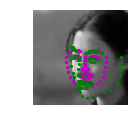

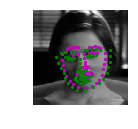

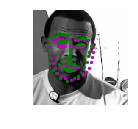

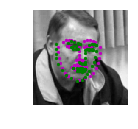

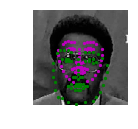

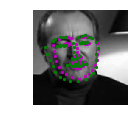

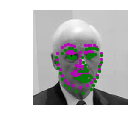

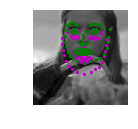

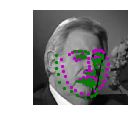

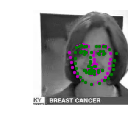

In [15]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

# visualize_output(test_images, test_outputs, gt_pts)
visualize_output(test_images, test_outputs, gt_pts)

Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [18]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: 
 <br/>I choose Adam optimizer and MSE for lose function.
 <br/>I read the paper for facial key point detection, they used adam for optimizer.
 <br/> Choose MSE cause I need to comapre the distance between predicted key points to real key points.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**:
<br/>I choose 4 convolutional layers and 3 fully connected layers with dropout first. 
<br/>I used to apply activation function at the last fully connected layer before output the results, then I found Loss is always higher than 0.6. 
<br/>After deleting activation function at the last layer, I found Loss is lower 0.3 after 2 epoches. It's great!
<br/>I add dropout layers after all the pooling layers and fully connected layers except the last layer to avoid overfitting.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: 
<br/>I tried 5 epoches first to make sure model works well. After that, I tried 30 epoches to fully train a model.
<br/>I usually use 32 batch_size to train model first. Model won't work well if batch size is to large so I prefer 32~128 batch size. 
<br/>But I got "Bus error" when I choosed 32 batch size for dataloader. After trying many different batch size, I still stick to 10 batch size.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.10428014 -0.01760738  0.06042084 -0.15555401 -0.160827  ]
 [ 0.10705476 -0.08914095  0.00496128  0.1322407   0.14452605]
 [ 0.1383296  -0.12107031 -0.11407881  0.09868393  0.01715964]
 [-0.05493597 -0.16395397  0.01013536  0.05135204  0.15460995]
 [-0.12204652 -0.0083486   0.15206854  0.11076844 -0.02098295]]
(5, 5)


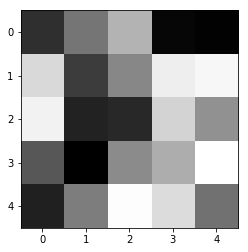

In [50]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 6

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

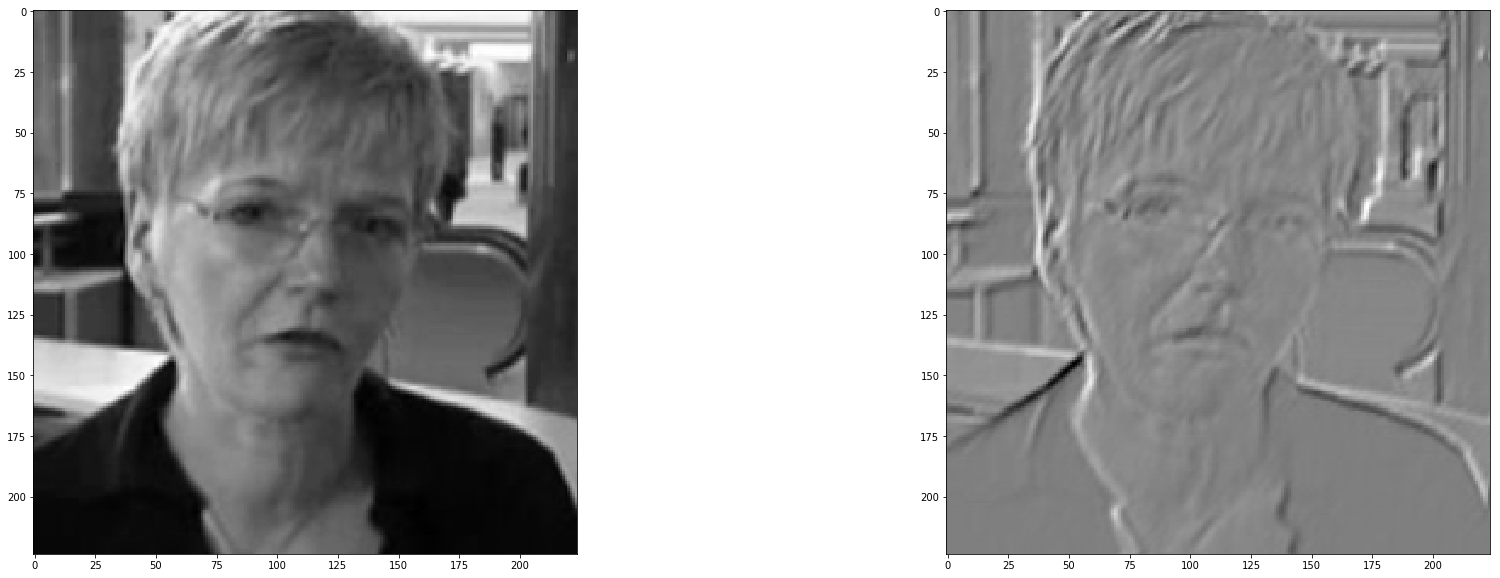

In [53]:
##TODO: load in and display any image from the transformed test dataset
import cv2
image_idx = 0
filter_index = 6


image = test_images[image_idx].data
image = image.numpy()
image = np.transpose(image, (1, 2, 0))
image = np.squeeze(image)
        
fig=plt.figure(figsize=(30, 10))
columns = 2
rows = 1
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    if ((i%2)==0):
        plt.imshow(image, cmap='gray')
    else:
        c = cv2.filter2D(image, -1, w[filter_index][0])
        plt.imshow(c, cmap='gray')
plt.show()


## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**:
<br/>This filter seems to selectivity detect vertical lines which left is dark and right is bright.
<br/>But it ignore those left is bright and right is dark.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!